In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [31]:
df = pd.read_csv("../zhvi_by_zipcode.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,111151.195242,...,267088.738142,271250.476096,275051.851633,277970.120290,279500.684442,279697.150054,279104.469255,278122.923459,276568.124992,274755.808173
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,218236.629470,...,460366.228569,467388.730310,473486.818408,477210.492486,477972.632081,476552.241458,474927.181941,473561.165436,471632.475487,469463.920712
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,93511.297481,...,180617.660428,182848.963204,185058.256434,187026.835439,188577.658260,189624.441718,190377.686632,191140.365708,191676.845108,192633.473062
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,276416.230880,...,835406.121511,842807.006210,852430.158990,860866.920365,867010.977280,866822.751400,865391.430701,864100.411762,862703.784805,861787.760011
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,249528.121575,...,759177.513267,766420.820233,774753.358516,781832.465374,785731.251344,785676.921895,784991.325145,784384.072545,782591.242654,781072.618787


In [32]:
df_local = df.loc[(df["Metro"]=="Austin-Round Rock-Georgetown, TX"),:]
num_of_zips = len(df_local["RegionName"])
print(f"There are {num_of_zips} zip codes for the 'Austin-Round Rock-Georgetown' metroplex")

There are 86 zip codes for the 'Austin-Round Rock-Georgetown' metroplex


In [33]:
# Write to CSV
df_local.to_csv('Resources/AustinMetroZHVI.csv')

In [34]:
df_local.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2022-09-30    float64
2022-10-31    float64
2022-11-30    float64
2022-12-31    float64
2023-01-31    float64
Length: 286, dtype: object

In [35]:
df_78739 = df_local.loc[df_local["RegionName"]==78739, :]
df_78739_data = df_78739.iloc[:,9:]
df_78739_data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
5585,359253.222565,360119.934617,360593.264503,361817.135898,361456.328366,361066.984369,360222.794126,359824.779547,359888.743259,361439.429825,...,831006.413701,845983.895531,854035.950967,852474.536476,845728.550181,836555.98254,829830.64314,824913.495518,819702.055836,814084.604018


In [36]:
df_78739_t = df_78739_data.transpose()

In [37]:
df_78739_t.reset_index(inplace=True)

In [38]:
df_78739_t

,index,5585
0,2000-01-31,359253.222565
1,2000-02-29,360119.934617
2,2000-03-31,360593.264503
3,2000-04-30,361817.135898
4,2000-05-31,361456.328366
...,...,...
272,2022-09-30,836555.982540
273,2022-10-31,829830.643140
274,2022-11-30,824913.495518
275,2022-12-31,819702.055836


In [39]:
df_local.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='object', length=286)

In [40]:
df_local_cut = df_local.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'])
df_local_cut.set_index('RegionName', inplace=True)

In [41]:
df_local_corrected = df_local_cut.transpose()

In [59]:
df_local_ready = df_local_corrected.loc[:, [78739, 78748, 78749, 78745, 78744, 78735, 78704, 78741, 78733, 78746, 78703, 78701, 78702, 78721, 78705, 78722, 78723, 78751, 78754, 78731, 78730, 78732, 78726, 78750, 78759, 78757, 78752, 78752, 78724, 78754, 78753, 78758, 78717, 78729, 78727, 78728]]

In [60]:
df_local_ready

RegionName,78739,78748,78749,78745,78744,78735,78704,78741,78733,78746,...,78752,78752,78724,78754,78753,78758,78717,78729,78727,78728
2000-01-31,359253.222565,182344.228005,276934.761053,155455.254715,100862.398093,365370.499292,2.290060e+05,130299.772261,4.141894e+05,5.375333e+05,...,127823.541059,127823.541059,101959.831070,169972.364052,129239.169483,149835.558397,NaN,191160.638874,193208.753935,191720.010212
2000-02-29,360119.934617,182815.639973,276434.028903,155315.624837,101266.178483,365580.323551,2.324339e+05,130944.859160,4.140504e+05,5.406685e+05,...,131071.862342,131071.862342,101930.259145,170183.128428,129560.510260,150251.679914,NaN,190781.832694,193874.348042,192032.987263
2000-03-31,360593.264503,183614.148308,275905.980030,156285.763549,101707.879551,365550.820886,2.367097e+05,131355.965062,4.146245e+05,5.454433e+05,...,134235.784319,134235.784319,102030.845136,170170.389351,129756.381270,150790.034306,NaN,190864.865427,194936.985474,192307.718717
2000-04-30,361817.135898,184999.195627,275031.050269,157217.270655,102387.826969,367107.654423,2.427809e+05,131995.996340,4.161017e+05,5.537444e+05,...,138779.698502,138779.698502,101976.340134,170504.803665,130348.392496,151944.869896,NaN,191472.686805,196222.834387,192862.720209
2000-05-31,361456.328366,186386.493838,274232.607532,157832.870443,102994.186874,368870.325435,2.494902e+05,132280.746897,4.165498e+05,5.618275e+05,...,142007.762991,142007.762991,101964.928201,171016.489494,130925.990256,152964.403505,NaN,192216.195839,196897.367085,193356.032235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,836555.982540,487680.113358,610600.378992,513299.133941,401943.936546,932173.049431,1.139625e+06,495366.454301,1.235231e+06,1.967345e+06,...,519190.048607,519190.048607,401446.072785,430006.762137,409962.048778,468769.813339,649574.667808,509619.926253,527701.966941,469626.955552
2022-10-31,829830.643140,482952.309897,606458.876173,507688.999212,396840.318299,920432.696380,1.123437e+06,488213.042936,1.213081e+06,1.934854e+06,...,510627.460404,510627.460404,395072.990448,424356.654656,406630.601486,464051.786209,643613.619510,503479.358135,523465.164219,465191.067507
2022-11-30,824913.495518,477851.691981,602729.209625,502164.760440,391299.912046,911264.009048,1.111299e+06,481700.196329,1.197487e+06,1.920596e+06,...,503643.814324,503643.814324,389216.598996,418379.328737,402709.339690,459323.963065,638546.891197,497234.288361,519309.167365,460809.406714
2022-12-31,819702.055836,471812.389573,597662.803738,496115.350762,384807.783077,901804.710897,1.101714e+06,474132.735320,1.185389e+06,1.919944e+06,...,496582.712484,496582.712484,382338.329133,412356.296333,397515.333542,453451.117066,633129.438656,490249.416895,514145.363703,455637.627329


In [43]:
df_local_ready.to_csv("Resources/zestimates_over_time.csv")

In [44]:
x = [dt.datetime.strptime(x, "%Y-%M-%d").date() for x  in df_local_corrected.index]


In [45]:
y= (round(x,2) for x in df_local_corrected[78739])

RuntimeError: matplotlib does not support generators as input

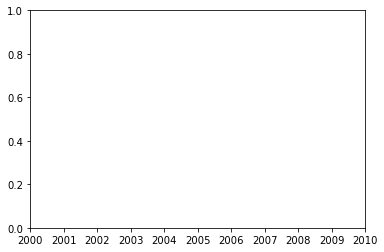

In [46]:
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("Monies")
plt.title("Monies for a home in 78739")

# Rental Data

In [47]:
df_rental = pd.read_csv("../rentals.csv")
df_rental.set_index("RegionName", inplace=True)
df_rental

,RegionID,SizeRank,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,2015-04-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
77449,91940,0,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,1328.456694,1342.566883,...,1849.717480,1831.473991,1838.869462,1882.316420,1926.351443,1921.750980,1898.745658,1863.467645,1860.010515,1852.405696
77494,91982,1,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1559.889116,1561.690931,...,1875.818810,1888.481043,1912.707976,1938.008450,1947.656014,1952.896837,1931.676245,1913.120132,1910.071281,1938.350446
79936,93144,2,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,NaN,...,1288.994158,1297.766637,1312.688880,1359.851359,1393.908991,1405.965503,1382.438406,1393.769524,1400.401923,1438.359788
11385,62093,4,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2155.301037,2193.199603,...,2743.739202,2804.811028,2903.246676,2980.607440,3053.127245,3058.235155,3056.748587,3027.272428,2974.360069,2922.226049
90011,95992,5,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,NaN,NaN,...,NaN,NaN,1791.584605,1794.678304,1852.757859,1868.442226,1916.560685,1920.038550,1889.509994,1899.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37219,74250,23957,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026.066647,1976.944444
11930,62281,24642,zip,NY,NY,NaN,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49391.059072,63149.625000
11959,62306,25872,zip,NY,NY,Quogue,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55000.000000


In [48]:
df_rental_local = df_rental.loc[df_rental["Metro"]=="Austin-Round Rock-Georgetown, TX", :]

In [49]:
df_rental_local_cut = df_rental_local.iloc[:,8:]
df_rental_local_cut

,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
78660,1243.868700,1231.563215,1240.925621,1265.511059,1287.913612,1288.795731,1291.197426,1288.569794,1290.706792,1291.671386,...,1829.785520,1862.526413,1884.061999,1912.723845,1899.402811,1891.957982,1884.500513,1885.419534,1870.178534,1877.866667
78666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1541.901006,1528.980440,1525.201322,1516.774852,1547.561174,1574.333057,1590.201254,1596.597334,1608.711082,1630.498046
78641,1318.922427,1322.208333,1323.594727,1336.944181,1349.101019,1357.873677,1355.941358,1347.332204,1354.159275,1352.981020,...,1947.939321,1990.733862,2004.717832,2015.252954,2000.219912,1999.312474,1990.162588,1982.039591,1970.468259,1974.598155
78613,1198.841790,1210.284581,1222.168029,1228.325738,1232.185208,1226.066388,1243.435428,1243.189623,1245.162106,1229.373109,...,1727.214751,1750.128436,1772.334993,1794.516219,1803.754611,1794.727604,1782.554277,1756.144012,1762.267657,1746.015075
78745,1065.842515,1097.610540,1119.407051,1131.108759,1133.466659,1140.234407,1126.299002,1121.670385,1122.668728,1125.523006,...,1691.979448,1705.105530,1739.359795,1763.760482,1778.917686,1766.425047,1750.368963,1728.428728,1714.235380,1703.767779
78664,1258.170401,1262.097678,1263.128980,1264.742678,1272.868388,1282.872130,1290.324437,1287.973902,1297.154573,1293.265779,...,1838.243546,1831.021688,1840.105326,1857.771587,1899.127144,1937.407831,1939.369444,1897.054019,1863.474719,1865.268519
78640,1242.314591,1248.228159,1257.398475,1258.395005,1261.925350,1273.832452,1281.596219,1283.861414,1270.952336,1271.209358,...,1816.047889,1835.668716,1873.224625,1897.564650,1890.725294,1894.629411,1871.263049,1866.830423,1859.051409,1873.602222
78753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1438.880373,1450.700180,1474.522842,1519.139302,1563.756087,1566.428494,1559.793156,1545.274797,1519.325351,1525.719934
78681,NaN,1332.824304,1331.255069,1336.254451,1332.052436,1334.613877,1336.140352,1330.593318,1321.811847,1316.617061,...,1937.297986,1947.553817,1967.394696,1973.749783,1991.487893,1986.735714,1971.917244,1959.813770,2013.792355,2038.124942


In [50]:
df_rental_ready = df_rental_local_cut.transpose()
df_rental_ready

RegionName,78660,78666,78641,78613,78745,78664,78640,78753,78681,78741,...,78730,78721,78726,78733,78645,78756,78701,78736,78722,76537
2015-03-31,1243.868700,NaN,1318.922427,1198.841790,1065.842515,1258.170401,1242.314591,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,1231.563215,NaN,1322.208333,1210.284581,1097.610540,1262.097678,1248.228159,NaN,1332.824304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,1240.925621,NaN,1323.594727,1222.168029,1119.407051,1263.128980,1257.398475,NaN,1331.255069,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,1265.511059,NaN,1336.944181,1228.325738,1131.108759,1264.742678,1258.395005,NaN,1336.254451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2380.778897,NaN,NaN,NaN
2015-07-31,1287.913612,NaN,1349.101019,1232.185208,1133.466659,1272.868388,1261.925350,NaN,1332.052436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2430.454802,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1891.957982,1574.333057,1999.312474,1794.727604,1766.425047,1937.407831,1894.629411,1566.428494,1986.735714,1644.408613,...,NaN,2006.445272,1705.467176,NaN,NaN,1912.877115,3175.634751,1686.905600,1953.591885,NaN
2022-10-31,1884.500513,1590.201254,1990.162588,1782.554277,1750.368963,1939.369444,1871.263049,1559.793156,1971.917244,1620.354838,...,NaN,1971.703863,1692.625586,NaN,NaN,1853.216195,3154.318391,1680.333349,1936.811692,NaN
2022-11-30,1885.419534,1596.597334,1982.039591,1756.144012,1728.428728,1897.054019,1866.830423,1545.274797,1959.813770,1603.744370,...,NaN,1957.604915,1681.300179,3103.00671,NaN,1853.938949,3106.972282,1685.973699,1928.238339,NaN
2022-12-31,1870.178534,1608.711082,1970.468259,1762.267657,1714.235380,1863.474719,1859.051409,1519.325351,2013.792355,1587.395442,...,NaN,1977.903651,1649.502358,NaN,NaN,1846.039153,3118.173250,1708.312503,1845.207629,NaN


In [53]:
df_rental_ready.columns

Int64Index([78660, 78666, 78641, 78613, 78745, 78664, 78640, 78753, 78681,
            78741, 78704, 78744, 78758, 78665, 78748, 78759, 78610, 78626,
            78628, 78723, 78749, 78634, 78717, 78750, 78705, 78746, 78727,
            78653, 78731, 78729, 78724, 78757, 78754, 78617, 78702, 78703,
            78728, 78739, 78752, 78621, 78735, 78734, 78747, 78738, 78620,
            78751, 78732, 78642, 78730, 78721, 78726, 78733, 78645, 78756,
            78701, 78736, 78722, 76537],
           dtype='int64', name='RegionName')

In [56]:
df_rental_over_time = df_rental_ready.loc[:, [78739, 78748, 78749, 78745, 78744, 78735, 78704, 78741, 78733, 78746, 78703, 78701, 78702, 78721, 78705, 78722, 78723, 78751, 78754, 78731, 78730, 78732, 78726, 78750, 78759, 78757, 78752, 78752, 78724, 78754, 78753, 78758, 78717, 78729, 78727, 78728]]


In [57]:
df_rental_over_time

RegionName,78739,78748,78749,78745,78744,78735,78704,78741,78733,78746,...,78752,78752,78724,78754,78753,78758,78717,78729,78727,78728
2015-03-31,NaN,1128.231561,NaN,1065.842515,NaN,NaN,1488.738257,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1298.037051,1084.332454,NaN,NaN
2015-04-30,NaN,1136.914112,NaN,1097.610540,NaN,NaN,1480.981293,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1300.114579,1080.756606,NaN,NaN
2015-05-31,NaN,1146.573022,NaN,1119.407051,NaN,NaN,1488.485541,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1316.105448,1091.164773,NaN,NaN
2015-06-30,NaN,1149.119332,NaN,1131.108759,NaN,NaN,1491.039788,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1329.469972,1109.328100,NaN,NaN
2015-07-31,NaN,1149.187263,NaN,1133.466659,NaN,NaN,1510.267406,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1316.411659,1121.423555,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,3626.360538,1745.039943,1892.973569,1766.425047,1849.211905,1934.683875,2328.180648,1644.408613,NaN,2092.703865,...,1865.696287,1865.696287,1925.971713,1610.420339,1566.428494,1835.032160,1892.830633,1629.207661,1792.867036,1836.622493
2022-10-31,3557.370333,1738.416841,1858.659751,1750.368963,1847.874432,1918.723173,2293.136404,1620.354838,NaN,2055.785724,...,1822.243546,1822.243546,1882.234880,1607.918983,1559.793156,1801.138037,1874.655173,1601.088812,1771.693488,1864.844849
2022-11-30,3532.674405,1711.797659,1827.096319,1728.428728,1808.525613,1899.508021,2258.590038,1603.744370,3103.00671,2044.082918,...,1796.787545,1796.787545,1830.304225,1611.288535,1545.274797,1767.245330,1838.525785,1589.472035,1755.229140,1830.248684
2022-12-31,NaN,1688.588541,1824.332867,1714.235380,1804.422200,1867.874292,2214.095813,1587.395442,NaN,2058.674237,...,1795.603492,1795.603492,1807.519921,1594.776253,1519.325351,1736.352493,1823.927152,1589.409992,1727.688420,1808.962423


In [58]:

df_rental_over_time.to_csv("Resources/rentals_over_time.csv")